# 36 Mice Feature Selection

## Yu Lab
### Uthman Qureshi
### Professor Lei Yu

#### Step 1:
Importing dataset and transforming features to use in our project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scipy
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

%matplotlib inline
# Format data into something more useable
df = pd.read_csv('decimal-dataset.csv')
#Y = pd.DataFrame([0,0,0,0,0,0, 2, 2, 2, 2, 2, 2])
Y = pd.DataFrame([0,0,0,0,0,0, 1, 1, 1, 1, 1, 1])

df = df.drop(columns=['Label'])

In [3]:
sel = VarianceThreshold(threshold=(.99))
X = pd.DataFrame(sel.fit_transform(df))
acc = []
features = []
for i in range(10,200):
    X_new = pd.DataFrame(SelectKBest(chi2, k=i).fit_transform(X, Y))
    y = Y
    y_true, y_pred = [],[]
    loo = LeaveOneOut()
    loo.get_n_splits(X)

    for train_index, test_index in loo.split(X_new,y):
        X_train, X_test = X_new.iloc[train_index], X_new.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = SVC(kernel="linear")
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        y_true.append(y_test[0])
        y_pred.append(yhat[0])
    accuracy = accuracy_score(y_true,y_pred)
    acc.append(accuracy)
    features.append(i)


Text(0, 0.5, 'Accuracy Score')

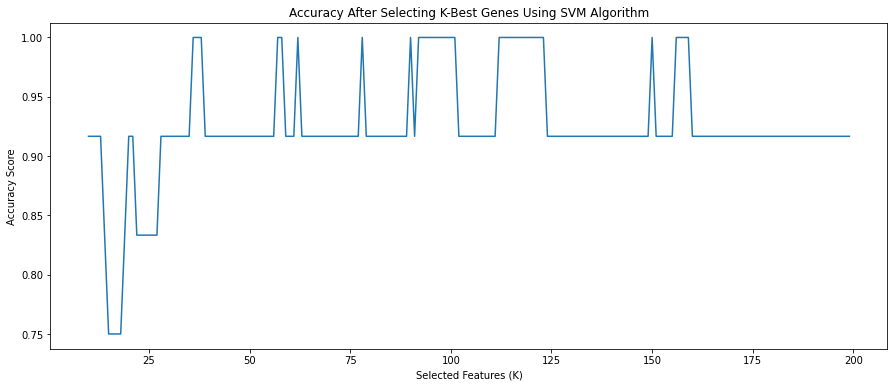

In [4]:
fig = plt.figure(figsize=(15, 6))
salplot = plt.subplot(1,1,1)
plot = plt.plot(features,acc)
salplot.set_title('Accuracy After Selecting K-Best Genes Using SVM Algorithm')
salplot.set_xlabel('Selected Features (K)')
salplot.set_ylabel('Accuracy Score')

In [5]:
def kbest_selector(data, ky):
    selector = SelectKBest(chi2, k=ky)
    selector.fit(data, Y)
    return data[data.columns[selector.get_support(indices=True)]]

def variance_selector(data, threshold):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [8]:
i=36

X_new = kbest_selector(variance_selector(df,.99),36)
X_new.to_csv('36 Ranked Features')
y = Y
y_true, y_pred = [],[]
loo = LeaveOneOut()
loo.get_n_splits(X)
for train_index, test_index in loo.split(X_new,y):
    X_train, X_test = X_new.iloc[train_index], X_new.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = SVC(kernel="linear")
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    y_true.append(y_test[0])
    y_pred.append(yhat[0])
print(accuracy_score(y_true,y_pred))
X_new

1.0


,A_52_P118356,A_52_P506920,A_51_P155514,A_51_P265444,A_51_P265822,A_52_P255458,A_51_P152602,A_52_P779070,A_51_P200930,A_52_P565496,...,A_52_P301602,A_51_P213260,A_51_P423290,A_51_P235619,A_52_P294663,A_51_P135920,A_52_P385526,A_51_P131069,A_52_P107890,A_51_P326826
0,6.194530,6.545916,4.416628,4.505516,2.618931,5.042486,3.202751,3.571099,5.375413,2.618662,...,5.386840,2.815644,5.727272,2.736533,5.760777,2.802069,2.863806,5.693906,3.342394,5.953542
1,4.107539,5.544442,5.294723,4.622636,2.637732,5.929663,5.151344,4.736483,5.265428,2.646224,...,4.656770,2.669629,2.852869,2.854689,4.253711,2.885838,3.201421,3.232994,3.266429,10.276587
2,5.356786,4.747124,4.562109,5.962299,2.652049,2.653811,6.249232,2.791063,4.435792,2.656280,...,6.528554,2.693294,4.688871,2.875456,6.421569,4.391233,3.385027,4.662312,3.606307,11.450621
3,3.797988,5.059654,3.484633,4.160647,3.010224,4.225599,3.548044,2.831789,4.109568,2.628533,...,4.339863,2.634981,3.063990,2.720270,4.217502,3.939872,17.399656,15.739473,14.113751,11.070911
4,4.133805,5.208323,5.205838,5.398305,2.643619,6.167079,2.735007,4.213772,4.783418,2.647292,...,3.944620,2.667193,6.102787,3.459973,6.601640,4.658196,3.087302,3.667749,3.340778,5.800419
5,3.661655,4.583977,6.137885,3.286685,2.635194,4.270593,4.492380,2.749728,4.642075,3.116937,...,4.050759,2.656940,6.779998,4.399690,6.273812,3.261891,2.969349,3.433340,3.437097,5.034252
6,2.833930,4.552269,4.342708,3.003710,3.876034,3.541949,2.690073,2.766335,4.644122,6.299576,...,4.291653,7.897305,3.326952,2.775100,4.288089,5.804633,2.937581,3.980614,2.946425,13.016562
7,2.930148,4.132979,5.587203,2.680790,5.285681,2.645121,2.711701,5.024821,3.583188,2.629284,...,2.652679,2.705935,2.818211,5.787437,3.820484,4.180201,3.278074,3.737766,3.314400,9.093616
8,2.957323,2.862424,7.873945,2.734418,2.662828,2.671912,2.791900,6.371493,2.694133,2.668387,...,2.650454,2.677632,2.865118,4.571706,4.502868,4.404641,3.493072,3.493611,3.383281,10.809365
9,2.893870,3.600723,2.724933,3.617351,5.620174,3.840603,3.010224,5.416747,2.677632,2.647045,...,2.644989,6.356424,2.833079,3.959158,3.631557,7.445489,3.185619,3.187335,3.182617,11.629826


No handles with labels found to put in legend.


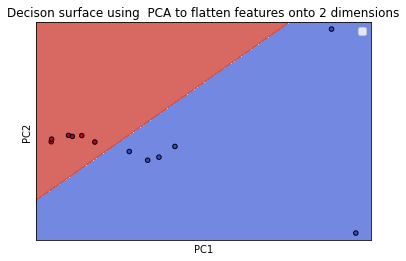

In [9]:
from sklearn.decomposition import PCA
X_new = kbest_selector(variance_selector(df,.99),36)
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X_new)
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
model = SVC(kernel='linear')
clf = model.fit(Xreduced, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = Xreduced[:, 0], Xreduced[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Decison surface using  PCA to flatten features onto 2 dimensions')
ax.legend()
plt.show()

In [47]:
from sklearn.model_selection import LeavePOut
X_new = kbest_selector(variance_selector(df,.99),36)
#X_new.to_csv('36 Ranked Features')
y = Y

accuracy = []
def validate (i):
    y_true, y_pred = [],[]
    lpo = LeavePOut(p=i)
    lpo.get_n_splits(X)
    for train_index, test_index in lpo.split(X_new,y):
        X_train, X_test = X_new.iloc[train_index], X_new.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = SVC(kernel="linear")
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        y_true.append(y_test[0])
        y_pred.append(yhat)
    return(accuracy_score(y_true,y_pred))
for i in range(1,6):
    accuracy.append(validate(i))


Text(0.5, 1.0, 'Error Rate Depending on Size of Test Set')

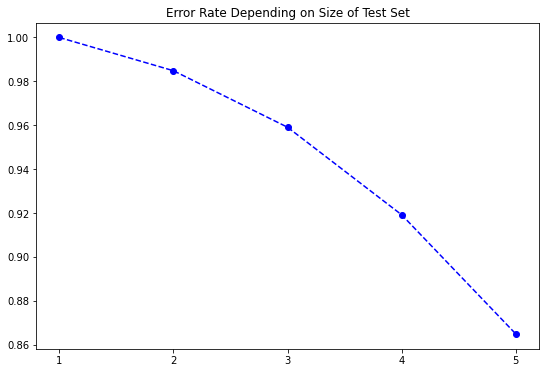

In [52]:
fig = plt.figure(figsize=(9, 6))
salplot = plt.subplot(1,1,1)
salplot.plot(range(1,6),accuracy, linestyle='--', marker='o', color='b')
salplot.set_xticks(range(1,6))
salplot.set_title('Error Rate Depending on Size of Test Set')


# Me Debugging

This is to answer the question of memorizing vs. learning. The code below this point is incomplete and needs to be worked on. We need to rework our algorithm so that the Chi2/F-test happens AFTER we split up the dataset into training vs testing. 

In [79]:
from sklearn.feature_selection import f_classif
sel = VarianceThreshold(threshold=(.99))

X = pd.DataFrame(sel.fit_transform(df))
y = pd.DataFrame([1, 1, 1, 1, 1, 1,0,0,0,0,0,0])
X_test, X_train = X.iloc[1:], X.iloc[:1]
y_test, y_train = [1,1,1,1,1,0,0,0,0,0,0],[1]
modifier = SelectKBest(chi2, k=10)
X_train = modifier.fit_transform(X_train,y_train)
print(X_train)
X_train = modifier.transform(X_train)
X_test = modifier.transform(X_test)
print(X_train)



model = SVC(kernel='linear')
model.fit(X_train, y_train)
a = model.predict(X_test)
a

        0         1         2         3          4         5        6    \
0  3.702515  7.683143  4.725802  8.998042  10.989189  2.874095  4.07522   

        7         8         9    ...       892       893      894       895  \
0  2.808327  2.805715  2.803984  ...  7.166524  5.784362  7.99467  5.953542   

        896       897       898       899       900       901  
0  5.498364  3.127906  3.922834  2.929738  5.310556  5.385411  

[1 rows x 902 columns]
[[7.166524 5.784362 7.99467  5.953542 5.498364 3.127906 3.922834 2.929738
  5.310556 5.385411]]


ValueError: The number of classes has to be greater than one; got 1 class

In [63]:
y_test

,0
1,1
2,1
3,1
4,1
5,1
6,0
7,0
8,0
9,0
10,0
